In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Import dữ liệu

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Asus\.cache\kagglehub\datasets\vjchoudhary7\customer-segmentation-tutorial-in-python\versions\1


## In ra dữ liệu

In [3]:
customer_data = pd.read_csv(path+'\\Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Xem thông tin của bảng hiện tại

In [4]:
#Get some in4 from data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Kiểm tra giá trị Null

In [5]:
#Checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Kiểm tra giá trị trùng lặp

In [6]:
#Checking dup value from customer ID
customer_data["CustomerID"].duplicated().sum()

np.int64(0)

## Kiểm tra giá trị ngoại lệ

In [7]:
#Checking invalid value:
len(customer_data[(customer_data["Spending Score (1-100)"] > 100) & ((customer_data["Spending Score (1-100)"] < 1))])

0

In [8]:
#Checking ourliers of "Annual Income" column

#Uppper quantile and lower quantlie
Q3,Q1 = customer_data["Annual Income (k$)"].quantile([0.75,0.25])
IQR = Q3 - Q1

#Accepted interval
lower_bound = Q1-1.5*IQR
upper_bound = Q3 + 1.5*IQR

#Checking value not in interval
len(customer_data[(customer_data["Annual Income (k$)"] < lower_bound) & customer_data["Annual Income (k$)"] > upper_bound])

0

In [9]:
X = customer_data.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Sử dụng Elbow method để  tìm số lượng cụm

In [10]:
# Finding number of clusters base on "Elbow method"

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

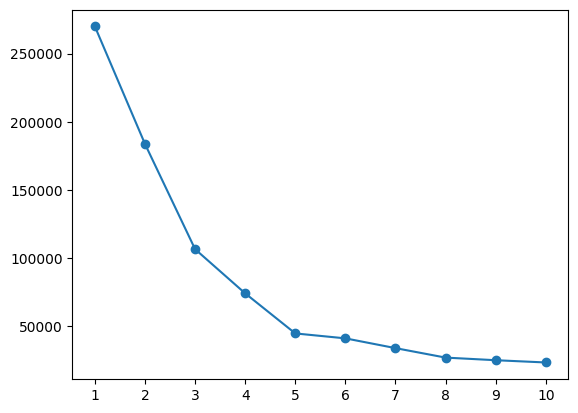

In [11]:
plt.plot(range(1,11),wcss,marker="o")
plt.xticks(range(1,11))
plt.show()

#### -> Dự đoán là 5, thử thêm Silhoutte Score

In [12]:
# Finding number of clusters base on "Silhoutte method"
from sklearn.metrics import silhouette_score
silhoutte_scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42)
    labels = kmeans.fit_predict(X)
    silhoutte_scores.append(silhouette_score(X,labels))

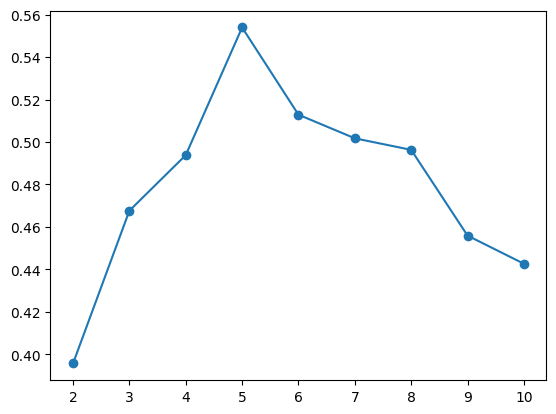

In [13]:
plt.plot(range(2,11),silhoutte_scores,marker="o")
plt.xticks(range(2,11))
plt.show()

#### -> Kết luận số cụm là 5

## Thực hiện phân cụm

In [14]:
## Training:
kmeans = KMeans(n_clusters=5,init="k-means++",random_state=42)

labels = kmeans.fit_predict(X)

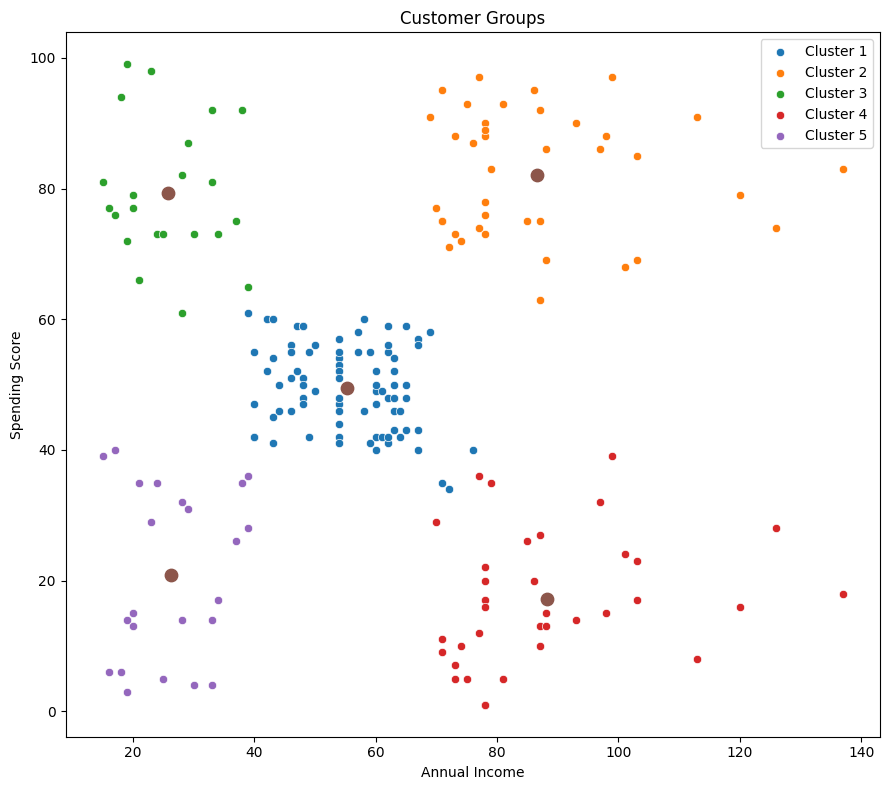

In [15]:
#Visualizing:
plt.figure(figsize=(9,8))

#Vẽ từng cụm
sns.scatterplot(x=X[labels==0,0],y=X[labels==0,1],label="Cluster 1")
sns.scatterplot(x=X[labels==1,0],y=X[labels==1,1],label="Cluster 2")
sns.scatterplot(x=X[labels==2,0],y=X[labels==2,1],label="Cluster 3")
sns.scatterplot(x=X[labels==3,0],y=X[labels==3,1],label="Cluster 4")
sns.scatterplot(x=X[labels==4,0],y=X[labels==4,1],label="Cluster 5")
#Hiện centroids:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=80)

plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.tight_layout()
plt.show()

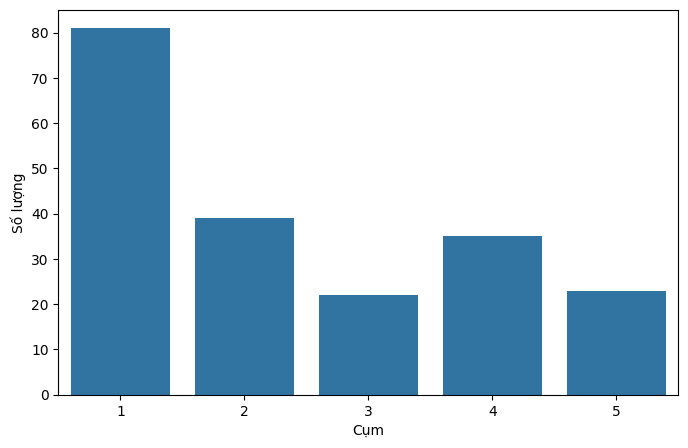

In [16]:
## Trực quan hóa số lượng các điểm nằm trong các cụm:
from collections import Counter
count = Counter(labels+1)
plt.figure(figsize=(8,5))
sns.barplot(count)
plt.ylabel("Số lượng")
plt.xlabel("Cụm")
plt.show()

#### Kết luận và đặt tên cho các cụm ta đã phân:
Ta có tất cả 5 cụm và chia các cụm này với các tên như sau:
+ Nhóm khách hàng thu nhập cao - mức chi tiêu thấp:
    Nhóm này nằm ở phía bên phải của biểu đồ, với thu nhập hàng năm cao (trên 80) nhưng điểm chi tiêu thấp (dưới 40).  
    -> Điều này có thể chỉ ra rằng họ có khả năng tài chính tốt nhưng không chi tiêu nhiều tại cửa hàng, có thể vì họ không bị hấp dẫn bởi sản phẩm/dịch vụ hoặc có xu hướng tiết kiệm.
    
+ Nhóm khách hàng thu nhập thấp - mức chi tiêu cao:
    Nhóm này nằm ở phía bên trái trên của biểu đồ, với thu nhập hàng năm thấp (dưới 40) nhưng điểm chi tiêu cao (trên 60).  
    -> Nhóm này có thể bao gồm những khách hàng có xu hướng chi tiêu nhiều tại cửa hàng mặc dù thu nhập không cao. Đây là nhóm khách hàng có thể được ưu tiên trong các chiến lược khuyến mãi hoặc chương trình khách hàng thân thiết. Là những tín đồ săn sale, săn hàng khuyến mãi số lượng lớn
    
+ Nhóm khách hàng thu nhập trung bình - mức chi tiêu trung bình:
    Nhóm khách hàng này tập trung ở giữa biểu đồ, với thu nhập từ 40 đến 80 và điểm chi tiêu từ 40 đến 60.  
    -> Đây là nhóm khách hàng có hành vi chi tiêu cân bằng, có thể là những khách hàng ổn định và có mức độ trung thành vừa phải. Họ là những người chi tiêu một cách khoa học, có tính toán cẩn thận hơn các nhóm khác
    
+ Nhóm khách hàng thu nhập cao - mức chi tiêu cao:
    Nhóm này nằm ở góc trên bên phải của biểu đồ, với cả thu nhập và điểm chi tiêu đều cao.  
    -> Nhóm này có khả năng là những khách hàng VIP hoặc khách hàng có giá trị cao đối với cửa hàng. Họ có khả năng tài chính tốt và sẵn lòng chi tiêu nhiều. Đây là nhóm khách hàng mà cửa hàng có thể đầu tư vào các dịch vụ đặc biệt hoặc ưu đãi để giữ chân.
    
+ Nhóm khách hàng thu nhập thấp - mức chi tiêu thấp:
    Nhóm này nằm ở góc dưới bên trái của biểu đồ, với cả thu nhập và điểm chi tiêu đều thấp.  
    -> Nhóm này có thể không phải là đối tượng khách hàng mục tiêu của cửa hàng, vì họ có khả năng tài chính thấp và không chi tiêu nhiều. Tuy nhiên, họ có thể được khuyến khích tham gia mua sắm nhiều hơn qua các chương trình giảm giá.
    
Tóm lại: Biểu đồ phân cụm này cung cấp cái nhìn sâu sắc về hành vi của các nhóm khách hàng dựa trên thu nhập hàng năm và điểm chi tiêu của họ. Các chiến lược tiếp thị hoặc ưu đãi có thể được tùy chỉnh dựa trên hành vi chi tiêu của từng nhóm để tối ưu hóa doanh thu và tăng cường mức độ trung thành của khách hàng.